## Equation de diffusion du champ magnétique

En reprenant les équations de Maxwell suivantes, nous pouvons montrer que le champ magnétique $\mathbf{B}$ obéit à une équation de diffusion. En se rappelant la loi d'Ohm $\mathbf{J} = \sigma \mathbf{E}$,
$$\nabla \times {\bf E} = -\partial_t {\bf B}\\
\nabla \times {\bf B} =\mu_0 {\bf J}\\
\nabla \cdot {\bf B}=0
$$
ensuite en subsituant $\mathbf{E}$ par $\dfrac{\mathbf{J}}{\sigma}$  puis $\mathbf{J}$ par $\dfrac{1}{\mu_0} \nabla \times {\bf B}$ dans le première équation, et en sachant que $\nabla \times(\nabla \times {\bf B}) = \nabla (\nabla \cdot {\bf B}) - \Delta \mathbf{B} = - \Delta \mathbf{B}$, nous obtenons l'équation de diffusion:
$$ \partial_t \bf{B} - \dfrac{1}{\sigma \mu_0} \Delta B = 0$$

## Description du problème et conditions aux bords

<img src='./figures/diagram.png' width='400px'>

#### Figure 1: Schéma de la géométrie considérée. Le conducteur est homogène et infini dans la direction z.

La zone sur laquelle nous allons résoudre l'équation diffusion du champ magnétique est la région grisée (ouverte) sur la Figure 1. Comme le problème est symétrique selon z, nous allons résoudre l'équation sur une tranche (bidimentionelle, orthogonale à la direction z) de la région grise. De plus, toujours à cause de la symétrie selon z, tous les courants dans le problème seront toujours de composante z nulle. Par conséquent, le champ magnétique est en tout instant et en tout point orienté selon z et nous allons donc résoudre l'équation pour la composante $B_z = |\mathbf{B}|$ uniquement.

Notons que le bord de la région grisée se sépare en deux parties: les contours des carrés de 0.5 et 1.5cm de côtés (que nous appellerons bords internes et externes, respectivement). Le bord externe est parcouru par un courant total de surface $J=1A/m$, nous pouvons alors calculer le champ magnétique produit dans un voisinage infinitésimal d'un point du bord avec une boucle d'ampère rectangulaire orthogonale au courant, traversée par celui-ci et avec deux côtés de longueur quelconque $L$ orientés selon z et deux côtés de longueur infinitésimale orthogonaux à l'axe z. Nous trouvons: 

$$ B\times L = \oint \mathbf B\cdot d\mathbf l = \iint (\nabla \times \mathbf B) \cdot d\mathbf S = \iint \mu_0\mathbf J \cdot d\mathbf S = -\mu_0 J\times L $$
$$ B = -\mu_0 J = -\mu_0 \times 1 A/m $$

Ceci donne la valeur du champ magnétique à une distance infitésimalement proche du bord, qui prend donc cette valeur fixe immédiatement après que le courant passe à $1A/m$. Cela nous donne une condition de Dirichlet pour le bord externe.

Concernant le bord interne, nous pouvons nous guider avec l'analogie de la chaleur dans laquelle la composante $B_z$ du champ magnétique est la température. Cette analogie est rigoureuse mathématiquement car dans les deux cas nous avons la même équation pour un champ scalaire. Pour trouver la condition sur le bord interne, il faut remarquer que le supraconducteur est caractérisé par une conductivité électrique infinie et que cela implique que la constante $1/\mu\sigma$ est nulle dans ce milieu. Le champ magnétique conserve donc sa valeur initiale, fixée à $0$, car 

$$ \partial_t \mathbf{B} = \frac{1}{\mu_0\sigma} \mathbf{\Delta} \mathbf{B} = 0$$

Le supraconducteur se comporte donc comme un isolant thermique dans l'analogie de la chaleur (sa température met un temps infini à augmenter). La condition au bord dans ce cas est que le flux de chaleur vers l'isolant est nul, autrement dit, par la loi de Fourier, que le produit scalaire entre le gradient de la température et la normale au côté du carré est nul sur le bord interne. Nous avons donc la condition de Neumann $(\nabla B)\cdot \mathbf n = 0$ pour le bord interne, où $\mathbf{n}$ est le vecteur normal à la surface du supraconducteur.

Par ailleurs, nous pouvons montrer que $(\nabla B)\cdot \mathbf n = 0$ est similaire au fait d'utiliser la condition de continuité des composantes tangentielles du champ électrique. En effet, $$ \mathbf{n} \times (\mathbf{E}_2 - \mathbf{E}_1) = \mathbf{0}$$ où l'indice $1$ représente le supraconducteur et $2$ le conducteur. Puisque la conductivité du supraconductivité, $\sigma_1$, est infinie, la loi d'Ohm nous donne que $\mathbf{E}_1 = \mathbf{0}$. Ainsi,
$$ \mathbf{n}\times \mathbf{E}_2  = \mathbf{0} \Longleftrightarrow \mathbf{n} \times \dfrac{\mathbf{J_2}}{\sigma_2}  = \mathbf{0} \Longleftrightarrow \mathbf{n} \times (\nabla \times \mathbf{B}_2) = \mathbf{0} \Longleftrightarrow \mathbf{n}\cdot (\nabla B) = 0$$

Dans notre cas, le vecteur normalisé $\mathbf{n}$ est soit $(1,0,0)$ soit $(0,1,0)$. Ceci nous montre soit que $\partial_x B = 0$ soit que $\partial_y B = 0$, respectivement. 

## Evolution au cours du temps - Méthode d'Euler

Importons tout d'abord les librairies utiles à notre travail.

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Nous implémentons le champ magnétique dans une matrice $(2N+1) \times (2N+1)$, avec ici $2N+1 = 121$, en y incluant la valeur du champ sur les bords du conducteur. La matrice $B0$ est l'état du champ magnétique en $t=0$; les bords de la matrice seront mis égaux à $-\mu_0$.

In [2]:
sigma = 5.96*10**7
mu = 1.26*10**-6

# parametres
T = 0.0125   # instant auquel nous calculons le flux
T2 = 0.00125 # instant auquel nous calculons B et J
L = 0.015
N = 60       # 2N+1 = 121

dx = L/(2*N+1)
dt_max = 1/4*(sigma*mu)*dx**2   # condition de stabilité

print("dt_max =", dt_max)

dt = 2.5*10**-7    # imposé
nt = int(T/dt)
M = 20 

print("nt =", nt)

B0 = numpy.zeros((2*N+1,2*N+1))     # condition initiale
B0[0,:] = -mu*numpy.ones(2*N+1)     # condition au bord de Dirichlet
B0[:,0] = -mu*numpy.ones(2*N+1)     # condition au bord de Dirichlet
B0[-1,:] = -mu*numpy.ones(2*N+1)    # condition au bord de Dirichlet
B0[:,-1] = -mu*numpy.ones(2*N+1)    # condition au bord de Dirichlet

dt_max = 2.8851512874803634e-07
nt = 50000


Nous vérifions que le pas de temps imposé est bien inférieur au pas de temps maximal nécessaire pour que le calcul soit stable.

La fonction $evolution$ simule la diffusion du champ magnétique dans la matrice $119 \times 119$ (sans les bords, qui sont fixés à $-\mu_0$). Nous retiendrons une matrice du champ magnétique $B$ sur dix afin de réalsier ultérieurement l'animation jusqu'à l'instant $T2$; toutes ces matrices seront stockées dans la variable $B\_data$. 

In [3]:
def evolution(B0, nt, dt, dx):
    
    B = B0.copy()
    
    for n in range(nt):
        
        Bn = B.copy()  
        Bn[N-M:N+M+1,N-M:N+M+1] = Bn[N-M-1,N]*numpy.ones((2*M+1,2*M+1))   # condition de Neumann (dérivée nulle)
        
        B[1:-1,1:-1] = Bn[1:-1,1:-1] + 1/(mu*sigma)*\
                (dt/dx**2 * (Bn[2:,1:-1] - 2*Bn[1:-1,1:-1] + Bn[0:-2,1:-1]) +\
                 dt/dx**2 * (Bn[1:-1,2:]- 2*Bn[1:-1,1:-1] + Bn[1:-1,0:-2]))
                
        if (n%10==0 and n>0 and n<=int(T2/dt)):
            B_data[int(n/10)] = B.copy()
        if n==int(T2/dt)-1:
            B_T2 = B.copy() # B_T2 est la matrice du champ magnétique à l'instant T2
            
    return B,B_T2 

La fonction $valeurs\_physiques$ permet de remettre les valeurs du champ magnétique dans le supraconducteur à 0. 

In [4]:
def valeurs_physiques(B_nonphys):
    
    B = B_nonphys.copy()
    B[N-M:N+M+1,N-M:N+M+1] = numpy.zeros((2*M+1,2*M+1))
    
    return B

### Simulation

In [33]:
import time

t0 = time.time()

B_data = numpy.zeros((int(T2/dt/10)+1,2*N+1,2*N+1))
B_data[0] = B0
[B_nonphys, B_T2_nonphys] = evolution(B0, nt, dt, dx)

# retire les valeurs qui n'ont pas de sens physique (les bords et la sous-diagonale )
B = valeurs_physiques(B_nonphys)
B_T2 = valeurs_physiques(B_T2_nonphys)

t1 = time.time()

total = t1-t0
print("Le temps mis pour simuler s'élève à =",total,"s")

Le temps mis pour simuler s'élève à = 11.340339422225952 s


### Visualisation

Ci-dessous, nous montrons le résultat de la diffsuion du champ magnétique après 1.25e-2 s. Celui-ci est presque uniformisé, comme le montre la légende.

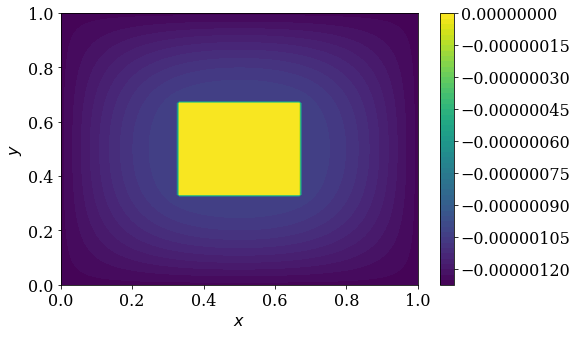

In [32]:
x = numpy.linspace(0,1,2*N+1)
y = numpy.linspace(1,0,2*N+1)

pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,B_T2,50,cmap=cm.viridis)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar();

##  Extraction des valeurs demandées pour $\mathbf B$ , $\mathbf J$ et pour le flux de $\mathbf B$

In [7]:
xIndex = int(2.5*10**-3/dx)
yIndex = int((1.5*10**-2 - 2.5*10**-3)/dx)

print("La valeur du champ magnétique en (2.5e-3 m, 2.5e-3 m, 0m) après 1.25e-3 s est :", \
      B_T2[xIndex,yIndex], "T")

La valeur du champ magnétique en (2.5e-3 m, 2.5e-3 m, 0m) après 1.25e-3 s est : -1.17283208517e-06 T


Pour calculer le courant à cet endroit, nous allons calculer le rotationnel à l'aide d'une dérivée discrète. Le rotationnel de $\mathbf B$ est donné par 

$$\nabla\times\mathbf B = \partial _y B \ \mathbf u_x - \partial _x B \ \mathbf u_y \qquad B:=B_z$$

Et s'approxime donc en (i,j) par

$$ \nabla\times\mathbf B = \frac{B[i-1,j]-B[i+1,j]}{2\Delta y}\ \mathbf u_x + \frac{B[i,j+1]-B[i,j-1]}{2\Delta x}\ \mathbf u_y$$

In [8]:
rotB = numpy.zeros(3)
rotB[0] = (B_T2[xIndex-1,yIndex] - B_T2[xIndex+1,yIndex])/2/dx
rotB[1] = (B_T2[xIndex,yIndex+1] - B_T2[xIndex,yIndex-1])/2/dx

currentDensity = 1/mu*rotB

print("La valeur de la densité de courant électrique en (2.5e-3 m, 2.5e-3 m, 0 m) après 1.25e-3 s est : \n",\
      currentDensity, "A/m^2")

La valeur de la densité de courant électrique en (2.5e-3 m, 2.5e-3 m, 0 m) après 1.25e-3 s est : 
 [-24.18209631 -24.18209631   0.        ] A/m^2


Nous obtenons le flux en sommant la valeur de $B$ sur chaque élément de surface et en pondérant par l'aire de cet élément.

In [9]:
flux = 0

for i in range(N):
    
    flux += 4*B[i,i]
    flux += 4*B[i,N]
    
    for j in range(i+1,N):
        
        flux += 8*B[i,j]
        
flux = flux*dx**2

print("Le flux du champ magnétique à travers la section z=0 du conducteur vaut :", flux, "Tm^2")

Le flux du champ magnétique à travers la section z=0 du conducteur vaut : -2.50950071514e-10 Tm^2


Nous pouvons comparer cela à la valeur théorique du flux une fois que le champ magnétique est totalement diffusé (uniforme, égal à $\mu(1 A/m^2)$), qui vaut

$$ flux = BS = -\mu_0(1 A/m^2)(1.5^2-0.5^2)\times 10^{-4}m^2 = -2.52\times 10^{-10} Tm^2$$

Ce qui est comme attendu à peine plus élevé en valeur absolue que le flux trouvé numériquement. En effet, après $0.0125$s, le champ magnétique est presque entièrement diffusé.

### Animation

In [10]:
from matplotlib import animation
from IPython.display import HTML

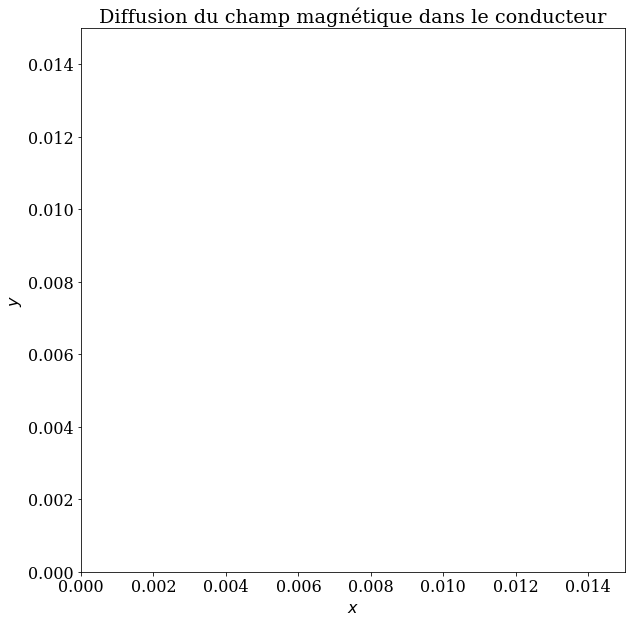

In [11]:
fig = pyplot.figure(figsize=(10,10))
pyplot.title('Diffusion du champ magnétique dans le conducteur')
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')

ims = []
for i in range(int(T2/dt/10)+1): 
    im = pyplot.imshow(valeurs_physiques(B_data[i]), animated = True, extent = [0,L,0,L])
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=10)

# ani.save('diffusion_B.mp4')

In [12]:
HTML(ani.to_html5_video())

Nous constatons que l'animation reproduit ce que nous avons l'habitude d'observer lors d'une diffusion.

## Extrapolation des données numériques

Nous utilisons notre connaissance de l'ordre de convergence de la méthode utilisée (ordre 1) pour extrapoler les valeurs limites des quantités que nous essayons de calculer sur base de quelques valeurs obtenues pour des nombres de points (n) bien précis.

L'idée est de calculer la courbe de la grandeur étudiée en fonction de n, connaissant l'ordre de convergence de la grandeur. Ensuite trouver parmi plusieurs valeurs test de la limite celle qui minimise l'erreur (somme des carrés des différences) entre la courbe calculée et les valeurs numériques.

Ci-dessous, les valeurs numériques calculées au préalable pour différentes valeurs de n.

In [13]:
n = numpy.array([61,121,241,361])
Bz = numpy.array([-1.17824993123e-06, -1.17283208517e-06 , -1.17005679282e-06, -1.16912759393e-06])
Jx = numpy.array([-22.76698736, -24.18209631, -24.89931707, -25.13821174])
flux = numpy.array([-2.49900564277e-10, -2.50950071514e-10, -2.51475008734e-10, -2.51650002337e-10])

Ci-dessous, la fonction de "fit", qui donne la courbe de la grandeur étudiée en fonction de n. Pour l'ordre 1, l'erreur évolue comme l'inverse du nombre n.

In [14]:
def fit_order1(nn,Binf, Bn0, n0):
    
    return Binf+(Bn0-Binf)*n0/nn

In [15]:
def error(n, Binf, Bn0, n0, num_values, fit_function):
    
    fit_n = fit_function(n, Binf, Bn0, n0)
    
    return numpy.sum((fit_n-num_values)**2);

In [16]:
def moindres_carrés (Binf_test, n, Bn0, n0, num_values, fit_function):
    
    errors = numpy.empty_like(Binf_test)
    
    for i in range(len(Binf_test)):
        errors[i] = error(n, Binf_test[i], Bn0, n0, num_values, fit_function)
        
    index_min = numpy.argmin(errors)
    
    return Binf_test[index_min]

In [17]:
Binf_test = numpy.linspace(-1.165e-6,-1.17e-6,1000)
Binf = moindres_carrés (Binf_test, n, -1.17283208517e-06, 121, Bz, fit_order1)
print("valeur extrapolée pour Bz =", Binf, "T")

Jxinf_test = numpy.linspace(-25,-26,1000)
Jxinf = moindres_carrés (Jxinf_test, n, -24.18209631, 121, Jx, fit_order1)
print("valeur extrapolée pour Jx =", Jxinf, "A/m^2")

fluxinf_test = numpy.linspace(-2.51e-10,-2.53e-10,1000)
fluxinf = moindres_carrés (fluxinf_test, n, -2.50950071514e-10, 121, flux, fit_order1)
print("valeur extrapolée pour le flux =", fluxinf, "Tm^2")

valeur extrapolée pour Bz = -1.1672972973e-06 T
valeur extrapolée pour Jx = -25.6206206206 A/m^2
valeur extrapolée pour le flux = -2.52011011011e-10 Tm^2


Nous remarquons que la valeur obtenue pour le flux est légèrement au-dessus de la théorique. Ceci est probablement dû à la technique d'extrapolation qui n'est pas parfaite (le premier ordre est le terme dominant, mais pas le seul).

Ci-dessous, les graphiques montrant la validité du fit.

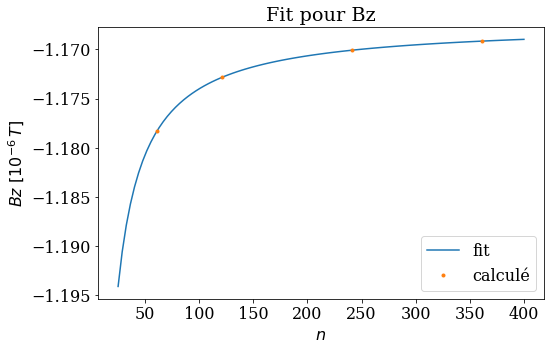

In [18]:
nn = numpy.linspace(25,400,100)
fit_nn = fit_order1(nn,Binf,-1.17283208517e-06,121)

pyplot.figure(figsize=(8,5));
pyplot.plot(nn,fit_nn*1e6, label='fit');
pyplot.plot(n,Bz*1e6,'.', label='calculé');
pyplot.title('Fit pour Bz');
pyplot.xlabel('$n$');
pyplot.ylabel('$Bz\ [10^{-6}\, T]$');
pyplot.legend();

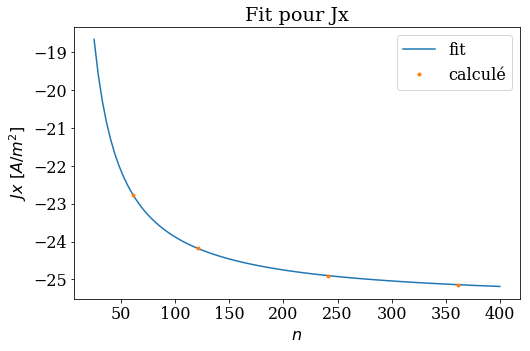

In [19]:
nn = numpy.linspace(25,400,100)
fit_nn = fit_order1(nn,Jxinf,-24.18209631,121)

pyplot.figure(figsize=(8,5));
pyplot.plot(nn,fit_nn, label='fit');
pyplot.plot(n,Jx,'.', label='calculé');
pyplot.title('Fit pour Jx');
pyplot.xlabel('$n$');
pyplot.ylabel('$Jx\ [A/m^2]$');
pyplot.legend();

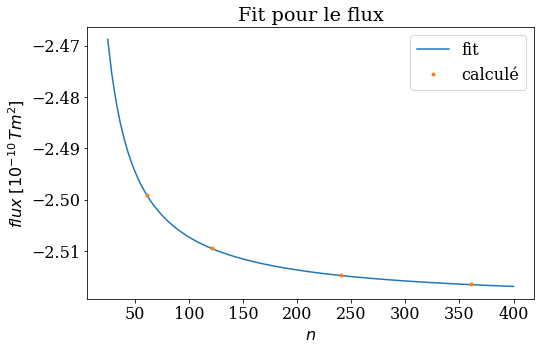

In [20]:
nn = numpy.linspace(25,400,100)
fit_nn = fit_order1(nn,fluxinf,flux[1],n[1])

pyplot.figure(figsize=(8,5));
pyplot.plot(nn,fit_nn *1e10, label='fit');
pyplot.plot(n,flux *1e10,'.', label='calculé');
pyplot.title('Fit pour le flux');
pyplot.xlabel('$n$');
pyplot.ylabel('$flux\ [10^{-10}\, Tm^2]$');
pyplot.legend();